In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras

2025-06-20 11:58:03.636393: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-20 11:58:03.676493: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-20 11:58:03.688770: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-20 11:58:03.692333: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-20 11:58:03.728294: I tensorflow/core/platform/cpu_feature_guar

In [2]:
schema = {
    # --- strings ------------------------------------------------------------
    "location":      "string",
    "type":          "string",
    "block":         "string",
    "street":        "string",
    "storey_range":  "string",   
    "flat_model":     "string",

    # --- numerics -----------------------------------------------------------
    "area_sqm":      "float64",
    "price":         "float64", 
    "commence_date": "Int64",   
    "Quantity_Index":"Int64",
}

In [3]:
data = pd.read_csv("../data.csv", parse_dates=["date"], dtype=schema, usecols=range(11))
data.dtypes

date             datetime64[ns]
location         string[python]
type             string[python]
block            string[python]
street           string[python]
storey_range     string[python]
area_sqm                float64
flat_model       string[python]
commence_date             Int64
Quality_Index             int64
price                   float64
dtype: object

In [5]:
features = ["area_sqm", "commence_date"]
df = data.dropna(subset=features + ["price"]).copy()

X = df[features]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

n_features = X_train.shape[1]

def rmse_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    return tf.sqrt(mse)

model = keras.Sequential([
    keras.layers.Input(shape=(n_features,)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64,  activation="relu"),
    keras.layers.Dense(1)                   
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=rmse_loss,                                            
    metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse"),
             tf.keras.metrics.MeanAbsoluteError(name="mae")]
)

model.summary()

history = model.fit(
    X_train, y_train,
    validation_split=0.20,
    epochs=500,
    batch_size=512,
    verbose=2
)

y_train_pred = model.predict(X_train, batch_size=256).squeeze()
y_test_pred  = model.predict(X_test , batch_size=256).squeeze()

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test , y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test , y_test_pred)

print(f"\nTrain RMSE : {train_rmse}")
print(f"Test  RMSE : {test_rmse}")
print(f"Train R²   : {train_r2}")
print(f"Test  R²   : {test_r2}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,985 (164.00 KB)

 Trainable params: 41,985 (164.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500


I0000 00:00:1750392097.985442   23551 service.cc:146] XLA service 0x722b04004e90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750392097.985456   23551 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2025-06-20 12:01:38.007144: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-06-20 12:01:38.090455: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90501
2025-06-20 12:01:38.915263: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_349', 168 bytes spill stores, 168 bytes spill loads

2025-06-20 12:01:39.433114: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in f

384/384 - 7s - 18ms/step - loss: 141067.3594 - mae: 118157.4766 - rmse: 155629.5781 - val_loss: 107054.7969 - val_mae: 85149.0078 - val_rmse: 107138.1562
Epoch 2/500
384/384 - 1s - 2ms/step - loss: 103073.1797 - mae: 82092.3672 - rmse: 103198.0781 - val_loss: 96131.9062 - val_mae: 76861.4609 - val_rmse: 96214.9297
Epoch 3/500
384/384 - 0s - 1ms/step - loss: 84913.0156 - mae: 66384.7578 - rmse: 85110.6250 - val_loss: 81087.2266 - val_mae: 62844.9336 - val_rmse: 81172.0781
Epoch 4/500
384/384 - 0s - 629us/step - loss: 81019.6250 - mae: 62469.6094 - rmse: 81121.9062 - val_loss: 81097.4219 - val_mae: 63003.2578 - val_rmse: 81180.5000
Epoch 5/500
384/384 - 0s - 616us/step - loss: 81019.5156 - mae: 62452.7812 - rmse: 81108.1172 - val_loss: 81247.0859 - val_mae: 61361.6875 - val_rmse: 81342.4766
Epoch 6/500
384/384 - 0s - 834us/step - loss: 81012.7188 - mae: 62443.4727 - rmse: 81099.3906 - val_loss: 81057.6016 - val_mae: 62648.1641 - val_rmse: 81143.8281
Epoch 7/500
384/384 - 1s - 1ms/step - 

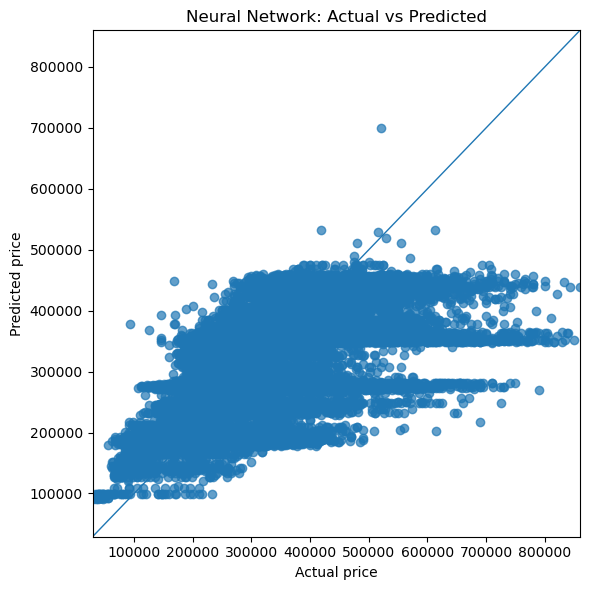

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)

lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims, linewidth=1)  
plt.xlim(lims)
plt.ylim(lims)

plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Neural Network: Actual vs Predicted")

plt.tight_layout()
plt.show()

In [7]:
num_cols = ["area_sqm", "commence_date"]            # numeric predictors
cat_cols = ["location", "type", "block",
            "street", "storey_range", "flat_model"]  # categoricals

df = data.copy()
df = df.dropna(subset=num_cols + cat_cols + ["price"])

X = df[num_cols + cat_cols]
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

n_features = X_train.shape[1]

def rmse_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    return tf.sqrt(mse)

model = keras.Sequential([
    keras.layers.Input(shape=(n_features,)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64,  activation="relu"),
    keras.layers.Dense(1)                   
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=rmse_loss,                                            
    metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse"),
             tf.keras.metrics.MeanAbsoluteError(name="mae")]
)

model.summary()

history = model.fit(
    X_train, y_train,
    validation_split=0.20,
    epochs=500,
    batch_size=512,
    verbose=2
)

y_train_pred = model.predict(X_train, batch_size=256).squeeze()
y_test_pred  = model.predict(X_test , batch_size=256).squeeze()

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test , y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test , y_test_pred)

print(f"\nTrain RMSE : {train_rmse}")
print(f"Test  RMSE : {test_rmse}")
print(f"Train R²   : {train_r2}")
print(f"Test  R²   : {test_r2}")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │       656,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 697,345 (2.66 MB)

 Trainable params: 697,345 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500


2025-06-20 12:04:53.495963: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_349', 300 bytes spill stores, 308 bytes spill loads



282/282 - 7s - 24ms/step - loss: 158772.1406 - mae: 135684.8594 - rmse: 176818.4531 - val_loss: 107537.9609 - val_mae: 85460.8203 - val_rmse: 107608.8594
Epoch 2/500
282/282 - 1s - 2ms/step - loss: 105117.8984 - mae: 83694.1250 - rmse: 105219.0078 - val_loss: 102256.3359 - val_mae: 81861.9297 - val_rmse: 102325.5391
Epoch 3/500
282/282 - 1s - 2ms/step - loss: 95205.7109 - mae: 75479.5000 - rmse: 95457.5547 - val_loss: 83923.9844 - val_mae: 67885.1016 - val_rmse: 84001.4375
Epoch 4/500
282/282 - 1s - 5ms/step - loss: 79566.8047 - mae: 61582.3555 - rmse: 79657.9531 - val_loss: 77654.6172 - val_mae: 59146.9609 - val_rmse: 77750.0625
Epoch 5/500
282/282 - 1s - 4ms/step - loss: 77907.6484 - mae: 59934.8125 - rmse: 77998.2109 - val_loss: 76684.9375 - val_mae: 58720.9648 - val_rmse: 76778.0000
Epoch 6/500
282/282 - 1s - 3ms/step - loss: 76971.6953 - mae: 59188.1562 - rmse: 77058.9141 - val_loss: 75836.1406 - val_mae: 58946.5703 - val_rmse: 75923.2109
Epoch 7/500
282/282 - 1s - 2ms/step - loss

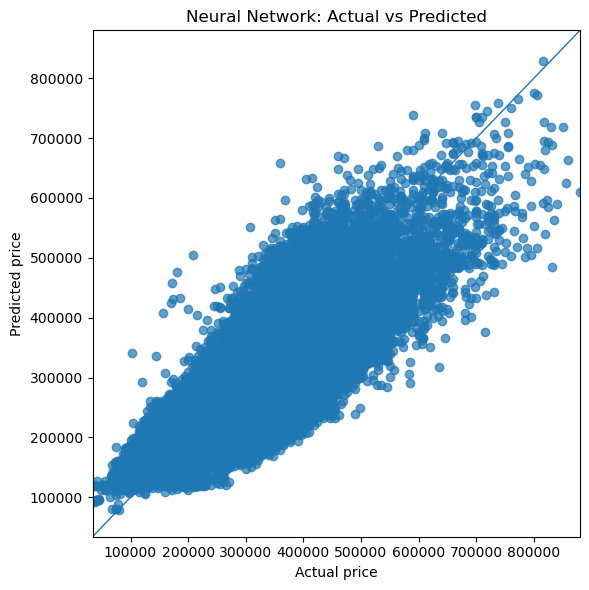

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)

lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims, linewidth=1)  
plt.xlim(lims)
plt.ylim(lims)

plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Neural Network: Actual vs Predicted")

plt.tight_layout()
plt.show()